In [ ]:
# import numpy untuk simbol matematis dan tabulate untuk membuat tabel
from numpy import sin, cos, tan, log, exp
from tabulate import tabulate

print("Formula fungsi = (2-exp(x)+x**2)/b ") #Fungsi diketahui dari soal
formula = input("Masukkan formula fungsi: ") #User menginput fungsi secara manual
print("Masukkan digit terakhir NPM Anda: 5") 
npm = 5 #digit terakhir NPM yaitu 5
b = max(npm,10-npm) #didapat nilai b = 5 dari digit terakhir NPM 
print("Nilai b = "+str(b))
iterasi= int(input('Tentukan banyak iterasi maksimal: ')) #User menentukan banyaknya iterasi
metode =int(input("Pilih metode yang ingin digunakan (1)Bisection (2)Fixed Point (3)Newton (4)Secant (5)Regula Falsi: ")) #User menentukan metode yang ingin di


if metode == 1:
    def f(x): #mendefinisikan f(x)
        return eval(formula)
    def Bisection(lower, upper, tolerance): #mendefinisikan bisection sebagai fungsi dengan lower=batas bawah, upper=batas atas, dan tolerance=batas toleransi aproksimasi
        tabel = [["i","Hasil Aproksimasi"]] #untuk tabel iterasi
        iter = [] #list yang nantinya diisi dengan hasil iterasi
        if f(lower)*f(upper)<0: #syarat metode bisection
            p0 = lower
            p = (lower+upper)/2
            if f(p)==0:
                return p #f(p)=0 maka p adalah akarnya
            elif f(p)*f(lower)>0: #mengganti lower dengan p
                lower=p
            elif f(p)*f(lower)<0: #mengganti upper dengan p
                upper= p
            abs_error= abs(p0-p) #menghitung absolute error
            p0=p #p0=p agar bisa looping kembali
            while abs_error>=tolerance: #syarat looping
                p = (lower+upper)/2
                if f(p)==0:
                    break
                elif f(p)*f(lower)>0:
                    lower=p
                elif f(p)*f(lower)<0:
                    upper=p
                abs_error= abs(p0-p)
                p0=p
                iter.append(p) #memasukkan hasil iterasi ke variabel iter
                if len(iter)>=iterasi: #membuat batas maksimal iterasi
                    iter = iter[:iterasi]
                    break
            for i,j in enumerate(iter,0):#membuat dan memasukkan hasil iterasi ke dalam tabel iterasi
                tabel.append([i,j])
            print(tabulate(tabel, headers='firstrow', tablefmt='pretty'))    
            return p #hasil aproksimasi akarnya     
        else:
            if f(lower)*f(upper)>0: #tidak dapat mencari aproksimasi akar
                return "Metode gagal mengaproksimasi akar. silakan ubah batas atas atau batas bawah."
            else:
                if f(lower)==0:   #f(lower)=0 maka lower akarnya 
                    return lower
                else:             #f(upper)=0 maka upper akarnya
                    return upper  
    low_bound= eval(input('Masukkan batas bawah interval: ')) #user memasukkan batas bawah
    up_bound= eval(input('Masukkan batas atas interval: ')) #user memasukkan batas atas
    tolerance= eval(input('Masukkan batas toleransi aproksimasi: ')) #user memasukkan nilai toleransi
    akar_bisection= Bisection(low_bound, up_bound, tolerance) #membuat variabel baru yang memberikan hasil aproksimasi akar
    
    #error handling
    try:
        print("Akar dari persamaan f(x) = {0} adalah x = {1:.7f}".format(formula, akar_bisection))
    except ValueError:
        print(akar_bisection)

elif metode == 2:
    def g(x): #mendefinisikan g(x)
        return eval(formula)
    def FixedPoint(p0, tolerance): #mendefinisikan fixedpoint sebagai fungsi dengan p0=titik awal iterasi dan tolerance=batas toleransi aproksimasi
        tabel = [["i","Hasil Aproksimasi"]] #untuk tabel iterasi
        iter = [] #list yang nantinya diisi dengan hasil iterasi
        p=g(p0) #menghitung iterasi pertama dengan metode fixed point
        abs_error = abs(p-p0) #menghitung absolute error
        p0 = p
        while abs_error>=tolerance: #syarat looping
            p=g(p0)
            abs_error= abs(p-p0)
            p0=p
            iter.append(p) #memasukkan hasil iterasi ke variabel iter
            if len(iter)>=iterasi: #membuat batas maksimal iterasi
                    iter = iter[:iterasi]
                    break
        for i,j in enumerate(iter,0):#membuat dan memasukkan hasil iterasi ke tabel iterasi
            tabel.append([i,j])
        print(tabulate(tabel, headers='firstrow', tablefmt='pretty'))  
        return p #hasil aproksimasi akarnya
    starting_point= eval(input("Masukkan titik awal iterasi: ")) #user memasukkan titik awal iterasi
    tolerance = eval(input("Masukkan batas toleransi aproksimasi: ")) #user memasukkan batas toleransi aproksimasi
    fixed_point = FixedPoint(starting_point, tolerance) #membuat variabel baru yang memberikan hasil aproksimasi akar
    print('Akar dari persamaan f(x) = {0} adalah x = {1:.7f}'.format(formula, fixed_point))
    
elif metode == 3:
    def f(x): #mendefinisikan f(x)
        return eval(formula)
    def df(x,h=10**-12): #turunan dari fungsi f(x)
        return (f(x+h)-f(x))/h
    def Newton(p0,tolerance): #mendefinisikan newton sebagai fungsi dengan p0=titik awal iterasi dan tolerance=batas toleransi aproksimasi
        tabel = [["i","Hasil Aproksimasi"]] #untuk tabel iterasi
        iter = [] #list yang akan diisi dengan hasil iterasi
        p = p0 - (f(p0)/df(p0)) #rumus metode newton
        abs_error = abs(p-p0) #untuk menghitung absolute error
        p0 = p
        while abs_error>=tolerance:#syarat looping
            p = p0 - (f(p0)/df(p0)) 
            abs_error = abs(p-p0)
            p0 = p
            iter.append(p) #memasukkan hasil iterasi ke variabel iter
            if len(iter)>=iterasi:#menentukan batas maksimal iterasi
                    iter = iter[:iterasi]
                    break
        for i,j in enumerate(iter,0):#membuat dan memasukkan hasil iterasi ke tabel iterasi
            tabel.append([i,j])
        print(tabulate(tabel, headers='firstrow', tablefmt='pretty')) 
        return p #hasil aproksimasi akarnya
    starting_point = eval(input('Masukkan titik awal iterasi : '))#user memasukkan titik awal iterasi
    tolerance = eval(input('Masukkan batas toleransi aproksimasi : '))#user memasukkan batas toleransi aproksimasi
    akar_newton = Newton(starting_point,tolerance)#membuat variabel baru yang memberikan hasil aproksimasi akar
    print('Akar dari persamaan f(x) = {0} adalah x = {1:.7f}'.format(formula,akar_newton))
    
elif metode == 4:
    def f(x): #mendefinisikan f(x)
        return eval(formula)
    def Secant(p0, p1, tolerance): #mendefinisikan secant sebagai fungsi dengan p0 adalah p(n-2) dan p1 adalah p(n-1)
        tabel = [["i","Hasil Aproksimasi"]] #untuk tabel iterasi
        iter = [] #list yang akan diisi dengan hasil iterasi
        p = p1- (f(p1)*(p1-p0))/(f(p1)-f(p0))#rumus metode secant
        abs_error=abs(p-p1) #menghitung absolute error
        p0 = p1
        p1 = p
        while abs_error>=tolerance: #syarat looping
            p = p1- (f(p1)*(p1-p0))/(f(p1)-f(p0))
            abs_error=abs(p-p1)
            p0 = p1
            p1 = p
            iter.append(p)#memasukkan hasil iterasi ke variabel iter
            if len(iter)>=iterasi:#membuat batas maksimal iterasi
                    iter = iter[:iterasi]
                    break
        for i,j in enumerate(iter,0):#membuat dan memasukkan hasil iterasi ke tabel iterasi
            tabel.append([i,j])
        print(tabulate(tabel, headers='firstrow', tablefmt='pretty')) 
        return p #hasil aproksimasi akarnya
    starting_point1= eval(input("Masukkan titik awal pertama: "))#user memasukkan p0
    starting_point2= eval(input("Masukkan titik awal kedua: "))#user memasukkan p1
    tolerance = eval(input("Masukkan batas toleransi aproksimasi: "))#user memasukkan batas toleransi aproksimasi
    akar_secant = Secant(starting_point1, starting_point2, tolerance)#membuat variabel baru yang memberikan hasil aproksimasi akar
    print('Akar dari persamaan f(x) = {0} adalah x = {1:.7f}'.format(formula, akar_secant))
    
elif metode == 5:
    def f(x):#mendefinisikan fungsi f(x)
        return eval(formula)
    def RegulaFalsi(p0,p1,tolerance):#mendefinisikan regulafalsi sebagai fungsi dengan p0 adalah p(n-2) dan p1 adalah p(n-1)
        tabel = [["i","Hasil Aproksimasi"]] #untuk tabel iterasi
        iter = [] #list yang akan diisi dengan hasil iterasi
        if f(p0)*f(p1) <0:
            p = p1 -(f(p1)*(p1-p0))/(f(p1)-f(p0)) #rumus metode regula falsi
            abs_error = abs(p-p1) #mencari nilai absolute errror

            if f(p1)*f(p0)<0:
                p0 = p1 #mengubah p1 menjadi p0
                p1 = p #mengubah p menjadi p1

            while abs_error >= tolerance: #syarat looping
                p = p1 -(f(p1)*(p1-p0))/(f(p1)-f(p0))
                abs_error = abs(p-p1)
                p0 = p1 
                p1 = p 
                iter.append(p) #memasukkan hasil iterasi ke variabel iter
                if len(iter)>=iterasi: #membuat batas maksimal iterasi
                    iter = iter[:iterasi]
                    break
            for i,j in enumerate(iter,0):#membaut dan memasukkan hasil iterasi ke tabel iterasi
                tabel.append([i,j])
            print(tabulate(tabel, headers='firstrow', tablefmt='pretty'))

            return p #hasil aproksimasi akarnya
        else:
            return "Metode gagal mengaproksimasi akar. silakan ubah titik awal."

    starting_point1 = eval(input("Masukkan titik awal pertama : ")) #user memasukkan p0
    starting_point2 = eval(input("Masukkan titik awal kedua : ")) #user memasukkan p1
    tolerance = eval(input("Masukkan nilai toleransi aproksimasi : ")) #user memasukkan batas toleransi aproksimasi
    akar_regulafalsi = RegulaFalsi(starting_point1,starting_point2,tolerance)
   

    print("Akar dari persamaan f(x) = {0} adalah x = {1:.7f}".format(formula, akar_regulafalsi))


else:
    print("Metode yang Anda pilih tidak ada.")




Formula fungsi = (2-exp(x)+x**2)/b 


<font size="5"> Tugas 1 Praktikum Metode Numerik </font>

<font size="4"> Favian Sulthan Wafi - 2106706205 </font>

Program ini adalah program untuk menentukan aproksimasi akar suatu fungsi dengan menggunakan metode bisection, fixed point, newton, secant, dan regula falsi. Berikut penjelasan programnya:
1. Install dan import module numpy untuk mendefinisikan sin, cos, tan, log, exp dan juga module tabulate untuk membuat tabel iterasi.
2. User akan menginput fungsi(sudah diketahui di soal), banyaknya iterasi yang diinginkan, dan metode yang ingin digunakan untuk mencari akar. Untuk digit terakhir NPM sudah diset bernilai 5. 
3. Setelah itu, program akan menjalankan if condition dari metode yang dipilih dan melanjutkan ke program yang sesuai dengan metodenya yang dipilih.
4. Selanjutnya, user kembali menginput nilai-nilai seperti titik awal, batas awal, batas toleransi aproksimasi, dan lainnya(setiap metode membutuhkan input nilai yang berbeda).
5. Kemudian, program dari metode yang dipilih akan terus berjalan sampai batas maksimal iterasi yang telah diinput.
6. Hasil dari setiap iterasi tersebut akan dimasukkan ke dalam tabel iterasi dan hasil akhirnya akan terlihat di bawah tabel iterasinya.

Agar lebih jelas, berikut hasil running program dari setiap metode.


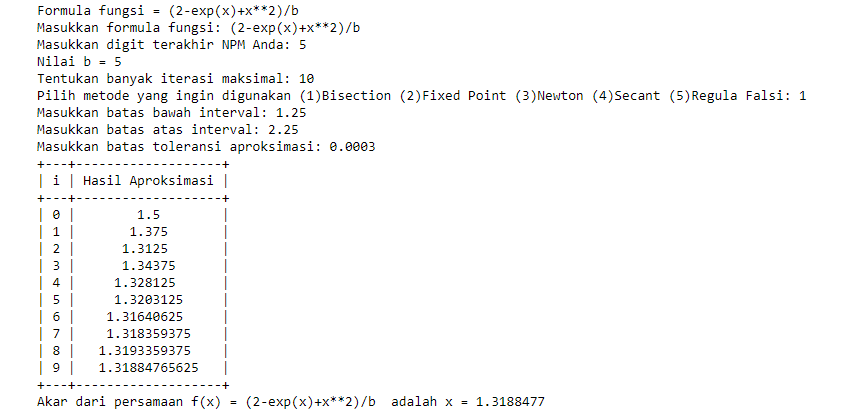

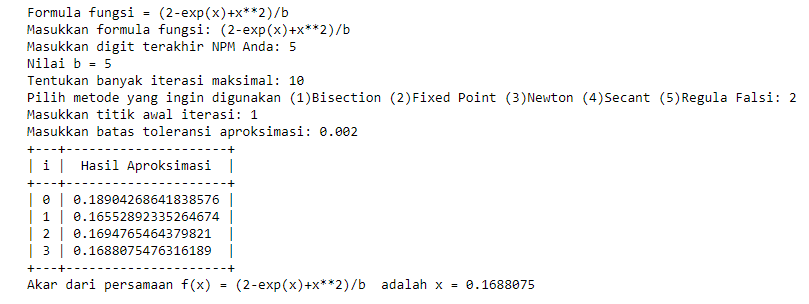

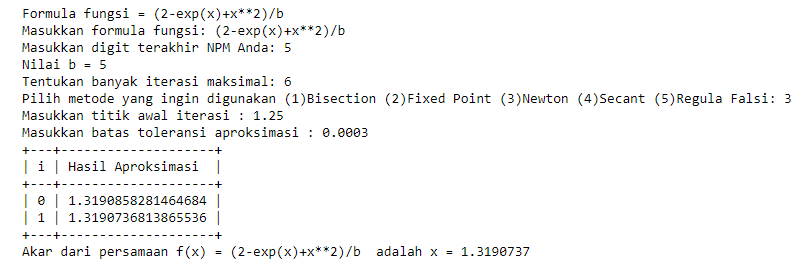

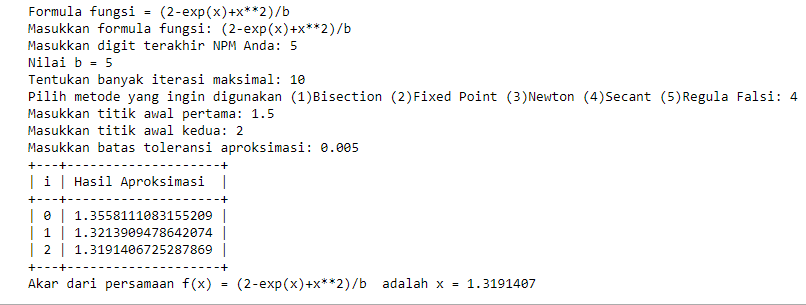

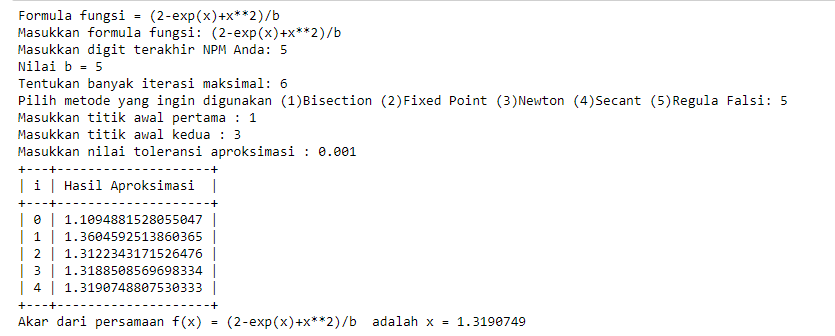